<a href="https://colab.research.google.com/github/Beytullah-1001/Deep-Learning-Fundamentals/blob/main/Pytorch/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.nn as nn


First, We're gonna create our dataset. Our dataset will include 500 points in it.And the shape of our dataset will be 2 circles. The inner circle indicates orange points which corresponds y=1 value, the outer circle indicates blue points corresponding y=0 values. Our aim is to seperate this point from each other by using non-linear boundaries. To do that we're going to use Neural Networks.

In [2]:
number_of_points=500
X,y=datasets.make_circles(n_samples=number_of_points,random_state=42,noise=0.1,factor=0.1)
print(X.shape)
print(y.shape)
print(X.dtype)

(500, 2)
(500,)
float64


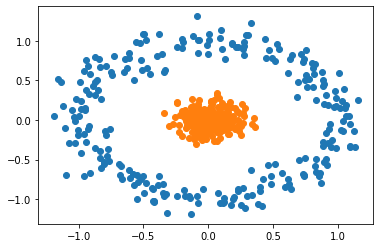

In [3]:
def plot_scatter():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
plot_scatter()

We've plotted our dataset using scatter method in matplotlib library. 

In [4]:
class LM(nn.Module):
  def __init__(self,input_layer,hidden_layer1,output_layer):
    super().__init__()
    self.linear=nn.Linear(input_layer,hidden_layer1)
    self.linear2=nn.Linear(hidden_layer1,output_layer)

  def forward(self,X):
    X=torch.sigmoid(self.linear(X))
    X=torch.sigmoid(self.linear2(X))
    return X
  def predict(self,X):
    pred=self.forward(X)
    if pred>=0.5:
      return 1
    if pred<0.5:
      return 0
print(X)




[[-9.36920246e-02  1.10057820e-01]
 [-6.74872433e-02  1.00676912e+00]
 [-4.31915822e-02  1.73311827e-02]
 [-6.11725049e-01 -6.31407105e-01]
 [-7.89012849e-01  6.84518885e-01]
 [-6.61152148e-02 -7.30542123e-02]
 [-5.52447609e-02  1.08599800e-01]
 [-9.49541514e-01  1.31193953e-01]
 [-2.04687773e-01  9.03653003e-01]
 [-2.36020621e-02 -2.21843882e-01]
 [ 9.85556831e-01  1.81268222e-01]
 [ 2.85658301e-01 -1.11580838e+00]
 [ 8.43386999e-02 -1.68385031e-01]
 [-6.38262619e-01  7.75061523e-01]
 [ 9.56329069e-02  6.02765775e-03]
 [-4.17662793e-02 -5.04835348e-02]
 [ 9.02036068e-02 -6.31213287e-02]
 [ 7.34043023e-01  7.34007095e-01]
 [ 1.59045431e-01 -8.78335266e-02]
 [ 9.35487501e-02 -2.09552690e-02]
 [ 6.00820378e-02 -7.96413370e-02]
 [ 2.01820252e-01  4.70777724e-04]
 [-8.05096491e-02  1.04761671e-01]
 [ 2.56235087e-02  1.31744452e-01]
 [-3.95505331e-01  8.08789805e-01]
 [ 2.30902476e-02  2.42338923e-01]
 [-5.47840048e-02 -9.18061902e-02]
 [ 5.96079805e-01 -8.43048424e-01]
 [-8.43553087e-01  7

Our neural network model. Which has 1 input layer, 1 hidden layer and 1 output layer. 

In [5]:
torch.manual_seed(2)
linear_model=LM(2,4,1)



In [7]:
from torch.nn.modules.linear import Linear
X_data=torch.tensor(X)
y_data=torch.tensor(y.reshape(500,1))
losses=[]
optimizer=torch.optim.Adam(linear_model.parameters(),lr=0.1)#We will use Stochastic gradient descent to train our model
criterion=nn.BCELoss()#We use binary Cross Entropy Loss. 
lm=Linear(2,4,1)
epochs=1000#Iteration number
losses=[]
for i in range(epochs):#This block of codes run 1000 times
  y_pred=linear_model.forward(X_data.float())#y_pred is equal to the result of forward function.Forward function returns y=wx+b
  loss=criterion(y_pred,y_data.float())#Our loss function.We've used BCE Loss function here. Binary Cross Entropy Loss Function
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print("Epoch:",i," Loss:",loss.item())

Epoch: 0  Loss: 0.7148460745811462
Epoch: 1  Loss: 0.6947548389434814
Epoch: 2  Loss: 0.695553719997406
Epoch: 3  Loss: 0.7015172839164734
Epoch: 4  Loss: 0.7014338374137878
Epoch: 5  Loss: 0.6975433826446533
Epoch: 6  Loss: 0.6940455436706543
Epoch: 7  Loss: 0.6930217742919922
Epoch: 8  Loss: 0.6941475868225098
Epoch: 9  Loss: 0.6957269310951233
Epoch: 10  Loss: 0.6962879300117493
Epoch: 11  Loss: 0.6954963207244873
Epoch: 12  Loss: 0.6939354538917542
Epoch: 13  Loss: 0.6924352049827576
Epoch: 14  Loss: 0.6915420889854431
Epoch: 15  Loss: 0.6912835240364075
Epoch: 16  Loss: 0.6912405490875244
Epoch: 17  Loss: 0.6908627152442932
Epoch: 18  Loss: 0.6898035407066345
Epoch: 19  Loss: 0.6880487203598022
Epoch: 20  Loss: 0.685814619064331
Epoch: 21  Loss: 0.6833541393280029
Epoch: 22  Loss: 0.6808047294616699
Epoch: 23  Loss: 0.6781370639801025
Epoch: 24  Loss: 0.6751995086669922
Epoch: 25  Loss: 0.6718183755874634
Epoch: 26  Loss: 0.6678938269615173
Epoch: 27  Loss: 0.663444459438324
Epoch

Text(0, 0.5, 'Loss')

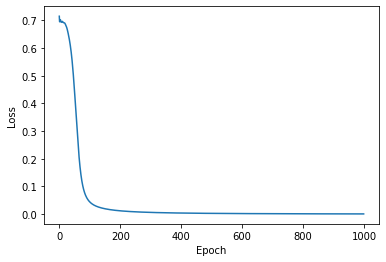

In [8]:
plt.plot(range(epochs),losses)#We are plotting our data using losses,first argument is our range of epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")

## **Testing Our Model**

In [9]:
def plot_decision_boundary(X,y):
  X_span=np.linspace(min(X[:,0]),max(X[:,0]))
  y_span=np.linspace(min(X[:,1]),max(X[:,1]))
  xx,yy=np.meshgrid(X_span,y_span)
  grid=torch.Tensor(np.c_[xx.ravel(),yy.ravel()])#Flettening
  pred_func=linear_model.forward(grid)
  z=pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,z)


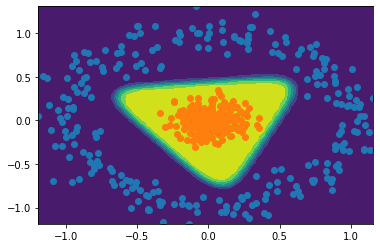

In [10]:
plot_decision_boundary(X,y)
plot_scatter()

In [12]:
point=torch.Tensor([0,1])
linear_model.predict(point)

0